In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [22]:
base_dir = r"C:\Users\Flavio Ruvalcaba\Documents\Escuela\Universidad\7_Semestre\inputData\faces"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [23]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.2,
							zoom_range = 0.2,
							horizontal_flip = True,)
							
val_datagen = ImageDataGenerator(1./255)

In [24]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 20,
							class_mode ='binary')


val_generator = val_datagen.flow_from_directory(
							validation_dir,
							target_size = (150,150),
							batch_size =20,
							class_mode= 'binary')

Found 19016 images belonging to 2 classes.
Found 2719 images belonging to 2 classes.


In [25]:
conv_base= VGG16(weights='imagenet',
								include_top=False,
								input_shape = (150,150,3))

In [26]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

conv_base.trainable = False

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
75/75 [==============================] - 63s 826ms/step - loss: 0.6049 - acc: 0.6780 - val_loss: 3.3375 - val_acc: 0.7340
Epoch 2/10
75/75 [==============================] - 52s 696ms/step - loss: 0.5080 - acc: 0.7594 - val_loss: 2.9741 - val_acc: 0.7600
Epoch 3/10
75/75 [==============================] - 60s 804ms/step - loss: 0.4732 - acc: 0.7880 - val_loss: 2.8457 - val_acc: 0.7440
Epoch 4/10
75/75 [==============================] - 62s 833ms/step - loss: 0.4597 - acc: 0.7920 - val_loss: 3.0559 - val_acc: 0.7660
Epoch 5/10
75/75 [==============================] - 62s 833ms/step - loss: 0.4242 - acc: 0.8013 - val_loss: 3.1290 - val_acc: 0.8020
Epoch 6/10
75/75 [==============================] - 62s 830ms/step - loss: 0.4239 - acc: 0.8260 - val_loss: 2.8927 - val_acc: 0.8360
Epoch 7/10
75/75 [==============================] - 64s 850ms/step - loss: 0.4117 - acc: 0.8133 - val_loss: 2.3718 - val_acc: 0.8540
Epoch 8/10
75/75 [==============================] - 57s 764ms/step - 

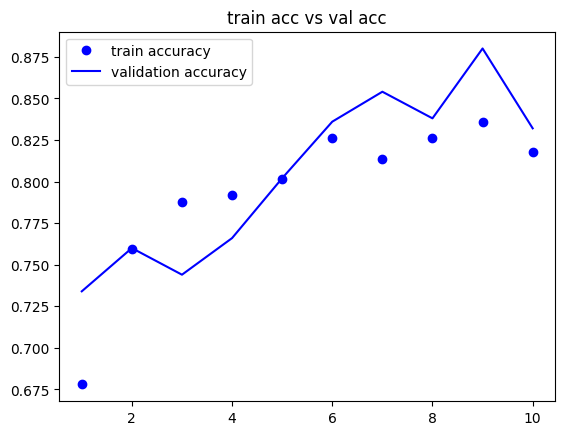

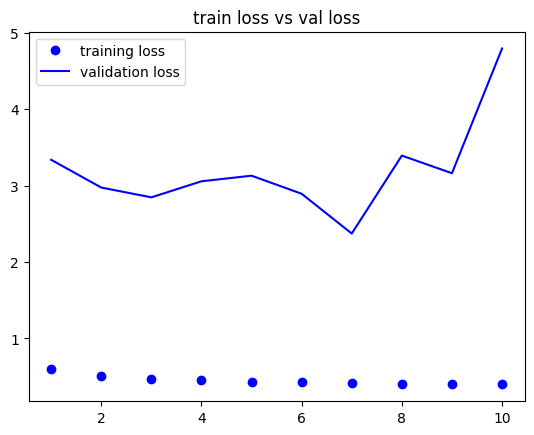

In [27]:

history = model.fit(train_generator, 
				steps_per_epoch = 75,  
				epochs = 10, 
				validation_data = val_generator, 
				validation_steps = 25)
				
model.save('vgg_man_woman_model.h5')
model.save('vgg_man_woman_model.keras')
			
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()



In [28]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)


Found 5432 images belonging to 2 classes.
25/25 [==============================] - 15s 601ms/step - loss: 2.6817 - acc: 0.8920

test acc :
 0.8920000195503235
